## CAPSTONE PROJECT - THE BATTLE OF AFRICA'S TOP DIGITAL HUBS/CITIES

## FINDING SILICON SAHARA

#### Import all modules and dependencies

In [1]:
# import modules and dependencies

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.4                |           py36_0         877 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.18.1               |             py_0          51 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         961 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.49-py_0

The following packages will be UPDATED:

  conda                                        4.6.3-py36_0 --> 4.6.4-py36_0
  geopy              conda-forge/linux-64::geopy-1.11.0-py~ --> conda-forge/noarch::geopy-1.18.1-py_0



geopy-1.18.1         

### PART 1

### UPLOADING AFRICA'S TECHNOLOGY ECOSYSTEM LANDSCAPE DATASET

Data for this project has been downloaded and restructured to an Excel file for ease of reading and manipulation. Link to the is uploaded to Github for reference.

The OS module allows us to access functionality of the underlying operating system. So we can perform tasks such as: navigate the file system, obtain file information, rename files, search directory trees, fetch environment variables, and many other operations.

In [2]:
# import modeles and dependencies for Data Processing
import os, sys      
import os
import os.path

import seaborn as sms
import pandas as pd
import numpy as np

import xlrd

from pandas import ExcelWriter
from pandas import ExcelFile

Access the HOME directory

In [3]:
# Lets access thr HOME directory by grabbing the HOME environment variable
print(os.environ.get('HOME'))

/home/jupyterlab


In [4]:
# get current working directory
print(os.getcwd())

/resources/labs/DP0701EN


In [5]:
# Navigate to the HOME directoryto access data by passing the path of the HOME environment variable
os.chdir('/home/jupyterlab')

In [7]:
# Confirm that we are in the HOME directory
print(os.getcwd())

/home/jupyterlab


In [8]:
# Get a list the directories, files and folders in the cirrent working directory
print(os.listdir())

['.oracle_jre_usage', '.local', '.config', '.jupyter', 'extensions', '.ipython', 'spark-2.3.1', 'conda', '.conda', '.cache', '.bashrc', 'run.sh', 'Makefile', '.npm', '.yarn', '.rlang', '.m2', 'hadoop-2.7.3', '.bash_logout', '.profile']


In [9]:
# Confirm that data file exists in the HOME directory  
print(os.path.isdir('/resources/African-Hubs_Geocoordinates.xlsx'))
print(os.path.isfile('/resources/African-Hubs_Geocoordinates.xlsx'))
print(os.path.exists('/resources/African-Hubs_Geocoordinates.xlsx'))

False
True
True


##### Read and Transform the African Technology Hubs geodata file into a pandas dataframe so that it is in a structured format

In [10]:
TechHubs_df = pd.read_excel('/resources/African-Hubs_Geocoordinates.xlsx', sheet_name=0, header=0)
TechHubs_df.to_excel('/resources/African-Hubs_Geocoordinates.xlsx', encoding='utf8')

In [11]:
TechHubs_df.shape

(215, 9)

In [12]:
TechHubs_df.head(5)

,Unnamed: 0,M49 Code,ISO-alpha3 Code,Country or Region,Name of Technology Hub,Ciategory,"City, State",Longitude,Latitude
0,0,24,AGO,Angola,KiandaHub,"Business Incubator, Hacherspace/Makerspace, Co...",Luanda,13.234320,-8.836800
1,1,204,BEN,Benin,Centre Songhaï,Co-working,Porto-Novo,2.605000,6.497222
2,2,204,BEN,Benin,e-TRILABS,"Business Incubator, Co-working",Cotonou,2.425500,6.362500
3,3,72,BWA,Botswana,Botswana Innovation Hub,"Business Incubator, Co-working",Gaborone,25.917644,-24.679921
4,4,854,BFA,BurkinaFaso,Jokkolabs Ouagadougou,Business Incubator,Ouagadougou,-1.523372,12.354395


In [13]:
TechHubs_df.rename(columns={'Country or Region':'Country', 'Name of Technology Hub':'Hubs', 'Ciategory':'Category', 'City, State':'City'}, inplace=True)
TechHubs_df.columns

Index(['Unnamed: 0', 'M49 Code', 'ISO-alpha3 Code', 'Country', 'Hubs',
       'Category', 'City', 'Longitude', 'Latitude'],
      dtype='object')

In [14]:
print(type(TechHubs_df.columns))
print(type(TechHubs_df.index)) 

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [15]:
TechHubs_df.columns.tolist()
TechHubs_df.index.tolist()

print (type(TechHubs_df.columns.tolist()))
print (type(TechHubs_df.index.tolist()))

<class 'list'>
<class 'list'>


### PART 2

### ANALYZING AFRICA'S TECHNOLOGY ECOSYSTEM LANDSCAPE

Examine Africa's technology landscape across slices of major dimensions for insights into its evolution and growth, top ecosystem countries and cities.

In [16]:
print('The African GeoHubs DataFrame shape is {}'.format(TechHubs_df.shape),'\n')
print('There are:')
print('  {} active physical spaces herein defined as Technology Hubs, and'.format(TechHubs_df['Hubs'].unique().shape[0]))
print('  {} unique categories these physical spaces'.format(TechHubs_df['Category'].unique().shape[0]))
print('These physical spaces, designed to foster and boost economic/technological advancement include incubators, accelerators, co-working spaces, fab labs, makerspaces, hackerspaces, innovation centers etc, all falling ubder the broader term Technology hub')

The African GeoHubs DataFrame shape is (215, 9) 

There are:
  215 active physical spaces herein defined as Technology Hubs, and
  12 unique categories these physical spaces
These physical spaces, designed to foster and boost economic/technological advancement include incubators, accelerators, co-working spaces, fab labs, makerspaces, hackerspaces, innovation centers etc, all falling ubder the broader term Technology hub


### Generate a world map centered around AFRICA

#### Define the Geolocation coordinates for Africa

In [17]:
from geopy.geocoders import Nominatim

# define Africa's geolocation coordinates (8.7832° S, 34.5085° E
address = 'Africa'

#geolocator = Nominatim()
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
latitude=8.7832
longitude=34.5085
print('The geograpical coordinate of Africa are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Africa are 8.7832, 34.5085.


##### Generate a world map centered around Africa

In [18]:
# Generate a world map centered around Frica with a lower zoom level

latitude = 8.7832 
longitude = 34.5085

Africa_map = folium.Map(location=[latitude, longitude], zoom_start=4)

# display world map
Africa_map

### Visualize Africa's Technology Ecosystem Landscape

Digital mapping of the Active Technology Hubs in Africa by colocation

In [19]:
# Digital mapping of Technology Hubs in Africa by geolocation

African_Hubs_map = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, Hubs, City in zip(TechHubs_df['Latitude'], TechHubs_df['Longitude'],
                                           TechHubs_df['Hubs'], TechHubs_df['City']):
    label = '{}, {}'.format('City', 'Hubs')
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(African_Hubs_map)  
    
African_Hubs_map

#### Explore Africa's Technology Ecosystem Landscape

In [20]:
# make a copy of the Technology Hubs dataframe for ease of accessibility 
CopyTechHubs_df = TechHubs_df.copy()

In [21]:
CopyTechHubs_df.shape

(215, 9)

In [22]:
CopyTechHubs_df.head(3)

,Unnamed: 0,M49 Code,ISO-alpha3 Code,Country,Hubs,Category,City,Longitude,Latitude
0,0,24,AGO,Angola,KiandaHub,"Business Incubator, Hacherspace/Makerspace, Co...",Luanda,13.23432,-8.836800
1,1,204,BEN,Benin,Centre Songhaï,Co-working,Porto-Novo,2.60500,6.497222
2,2,204,BEN,Benin,e-TRILABS,"Business Incubator, Co-working",Cotonou,2.42550,6.362500


In [23]:
Countries_df = CopyTechHubs_df.groupby(['Country'], as_index=True).size().to_frame(name='Count')

In [24]:
Countries_df = Countries_df.sort_values(['Count'], ascending=0).reset_index()

In [25]:
Countries_df

,Country,Count
0,South Africa,40
1,Ghana,29
2,Egypt,21
3,Kenya,17
4,Nigeria,16
5,Uganda,12
6,Senegal,10
7,Tanzania,10
8,Morocco,8
9,Zambia,6


In [26]:
Top5_Countries = Countries_df.head()
Top5_Countries

,Country,Count
0,South Africa,40
1,Ghana,29
2,Egypt,21
3,Kenya,17
4,Nigeria,16


In [27]:
print('There are {} Countries with Active Technology hubs in Africa:'.format(Countries_df['Country'].shape[0]))
print('Top 5 Ecosystem Countries by number of active hubs are:')
print('  South Africa', Top5_Countries.loc[0, 'Count'])
print('  Ghana', Top5_Countries.loc[1, 'Count'])
print('  Egypt', Top5_Countries.loc[2, 'Count'])
print('  Kenya', Top5_Countries.loc[3, 'Count'])      
print('  Nigeria', Top5_Countries.loc[4, 'Count'])      
print('Together, the Top5 Ecosystem by Countries account for over 50% of all active tech hubs in Africa.')   

There are 33 Countries with Active Technology hubs in Africa:
Top 5 Ecosystem Countries by number of active hubs are:
  South Africa 40
  Ghana 29
  Egypt 21
  Kenya 17
  Nigeria 16
Together, the Top5 Ecosystem by Countries account for over 50% of all active tech hubs in Africa.


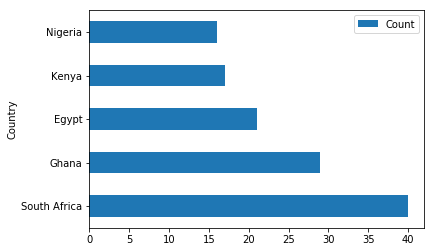

In [28]:
Top5_Countries.plot(x='Country', y='Count', kind='barh')

In [29]:
Cities_df = CopyTechHubs_df.groupby(['City'], as_index=True).size().to_frame(name='Count')

In [30]:
Cities_df = Cities_df.sort_values(['Count'], ascending=0).reset_index()

In [31]:
Cities_df

,City,Count
0,Nairobi,15
1,Kampala,11
2,Accra,9
3,Lagos,9
4,Johannesburg,9
5,Cape Town,9
6,Cairo,7
7,Dakar,7
8,Dar es Salaam,6
9,Alexandria,5


In [32]:
Top5_Cities = Cities_df.head()
Top5_Cities

,City,Count
0,Nairobi,15
1,Kampala,11
2,Accra,9
3,Lagos,9
4,Johannesburg,9


In [33]:
print('Africas {} Active Technology Hubs are spread between {} Cities'.format(CopyTechHubs_df['Hubs'].unique().shape[0],
     CopyTechHubs_df['City'].unique().shape[0]))

print('The Top 5 Ecosystem Cities by number of active tech hubs are:')
print('  Nairobi', Top5_Cities.loc[0, 'Count'])
print('  Kampala', Top5_Cities.loc[1, 'Count'])
print('  Accra', Top5_Cities.loc[2, 'Count'])
print('  Lagos', Top5_Cities.loc[3, 'Count'])      
print('  Johannesburg', Top5_Cities.loc[4, 'Count'])

Africas 215 Active Technology Hubs are spread between 101 Cities
The Top 5 Ecosystem Cities by number of active tech hubs are:
  Nairobi 15
  Kampala 11
  Accra 9
  Lagos 9
  Johannesburg 9


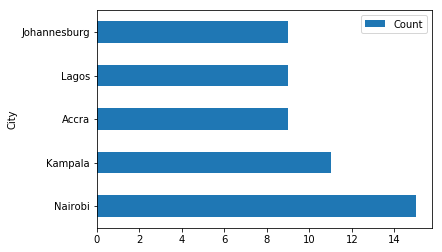

In [34]:
Top5_Cities.plot(x='City', y='Count', kind='barh')

#### PART 3. 

#### DATA PREPROCESSING AND PREPARATION

##### Data cleaning and Preprocessing must precede Data Exploration and Analysis by The Foursquare API. Data Preprocessing is performed to remove duplication of data, check the data for inconsistency, and correct errors in the data.

In [36]:
# Recall the Geohubs Data fframa
TechHubs_df.shape

(215, 9)

In [37]:
CopyTechHubs_df.head()

,Unnamed: 0,M49 Code,ISO-alpha3 Code,Country,Hubs,Category,City,Longitude,Latitude
0,0,24,AGO,Angola,KiandaHub,"Business Incubator, Hacherspace/Makerspace, Co...",Luanda,13.234320,-8.836800
1,1,204,BEN,Benin,Centre Songhaï,Co-working,Porto-Novo,2.605000,6.497222
2,2,204,BEN,Benin,e-TRILABS,"Business Incubator, Co-working",Cotonou,2.425500,6.362500
3,3,72,BWA,Botswana,Botswana Innovation Hub,"Business Incubator, Co-working",Gaborone,25.917644,-24.679921
4,4,854,BFA,BurkinaFaso,Jokkolabs Ouagadougou,Business Incubator,Ouagadougou,-1.523372,12.354395


In [38]:
hubs_Centroids = CopyTechHubs_df.copy()

In [39]:
hubs_Centroids.drop(['Unnamed: 0','Country','Category'],axis=1, inplace=True)

In [40]:
hubs_Centroids.shape

(215, 6)

In [41]:
hubs_Centroids.head(3)

,M49 Code,ISO-alpha3 Code,Hubs,City,Longitude,Latitude
0,24,AGO,KiandaHub,Luanda,13.23432,-8.836800
1,204,BEN,Centre Songhaï,Porto-Novo,2.60500,6.497222
2,204,BEN,e-TRILABS,Cotonou,2.42550,6.362500


In [42]:
hubs_Centroids.rename(columns={'M49 Code':'Areacode', 'Hubs':'Hub'}, inplace=True)
hubs_Centroids.columns

Index(['Areacode', 'ISO-alpha3 Code', 'Hub', 'City', 'Longitude', 'Latitude'], dtype='object')

#### Map the Regional codes of Africa's active technology hubs as markers on a map of Africa using the hubs geo coordinates data.

In [43]:
map = folium.Map(location=[8.7832, 34.5085], zoom_start=11) 

for location in CopyTechHubs_df.itertuples(): #iterate each row of the dataframe
    label = 'M49 Code: {};  Hubs: {};  City: {}'.format(location[1], location[2], location[3])
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [location[-2], location[-1]],
        radius=1,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 
    folium.Circle(
        radius=500,
        popup=label,
        location=[location[-2], location[-1]],
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(map) 
    
map

#### The map shows that the technology Hubs co-location are not evenly spaced, and the area cover by some of them, using a radius of 500 meters, overlaps. A different radius for each technology Hub may result in a better venues search because it will avoid misrepresentation of the number of venues per technology Hub caused by too large or low radius values

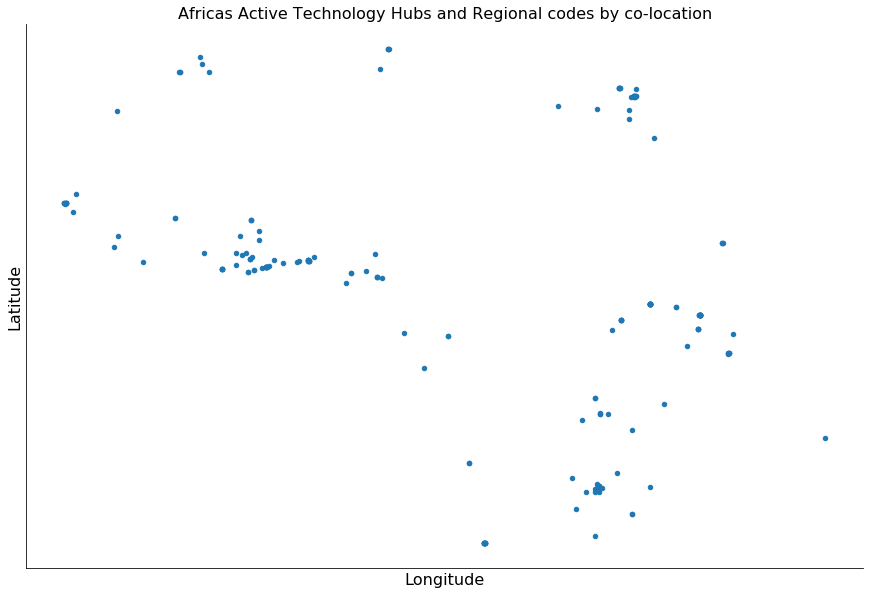

In [44]:
import matplotlib.pyplot as plt

X = CopyTechHubs_df[['Longitude', 'Latitude']]

scatter_plot = X.plot.scatter(x='Longitude', 
               y='Latitude',  
               fontsize = 16,
               figsize=(15, 10))

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
scatter_plot.set_title('Africas Active Technology Hubs and Regional codes by co-location', fontsize=16)

scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()

#### To define the radius use with foursquare it's necessary to find the closest points for each Technology Hub.

In [45]:
from geopy.distance import great_circle

#function to get the closest geo coordinate pair and the distance using latitude and longitude
def closest_Hub(Hub, Hubs):
    Hub = np.asarray(Hub).reshape(1,-1)
    Hubs = np.asarray(Hubs)
    distances = [great_circle(Hub, point).meters for point in Hubs]
    closest_Hub_index = np.argmin(distances)
    return [round(distances[closest_Hub_index]), closest_Hub_index]

To explore the distance function, closest Technology Hub to the first example in the dataframe is found

In [46]:
coordinates = hubs_Centroids[['Latitude', 'Longitude']]

distance, closest_point_index = closest_Hub(coordinates[:1], coordinates[~coordinates.index.isin([0])])
close_points = X[:1].append(X[closest_point_index+1:closest_point_index+2])
close_points

,Longitude,Latitude
0,13.234320,-8.8368
18,15.322222,-4.3250


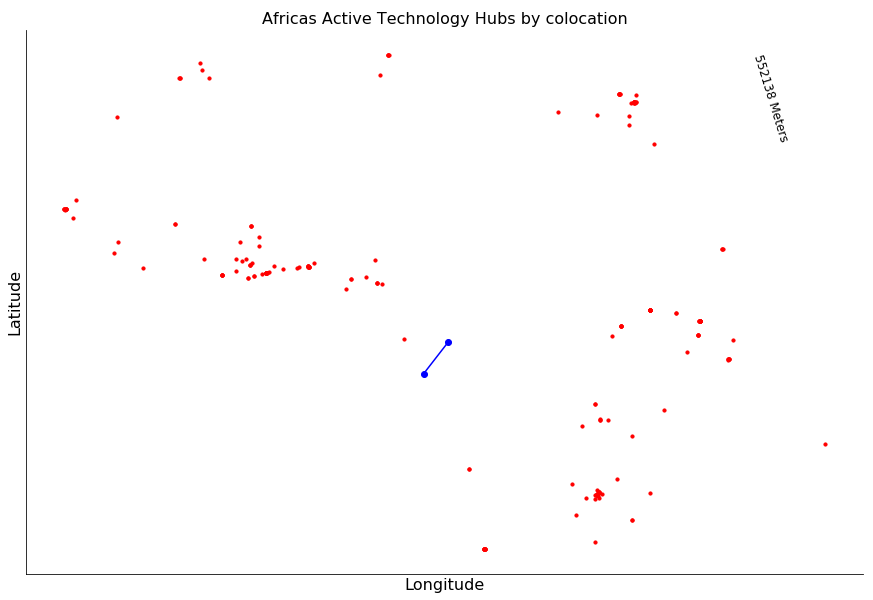

In [47]:
fig = plt.figure(figsize=(15,10))
scatter_plot = fig.add_subplot(111)
scatter_plot.scatter(X['Longitude'],X['Latitude'], s=10, c='r', marker="o")
scatter_plot.plot(close_points['Longitude'], close_points['Latitude'], c='b', marker="o")

# plt.legend(loc='upper left');
scatter_plot.annotate('{} Meters'.format(distance),
            xy=(.859, .912), xycoords='figure fraction',
            ha='left', va='top', rotation=-73,
            fontsize=12)

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)

plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Africas Active Technology Hubs by colocation', fontsize=16)

scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()

#### Add a 'Distance' column to the DataFrame to be used as the radius cover for each Technology Hub

In [48]:
from math import isnan

for lat, lng, idx in zip(hubs_Centroids['Latitude'], hubs_Centroids['Longitude'], hubs_Centroids.index):
    distance, closest_point_index = closest_Hub([lat,lng], coordinates[~coordinates.index.isin([idx])])
    hubs_Centroids.at[idx,'Distance'] = np.int64(distance//2) #use the half of the disstance to avoid overlapping
    
hubs_Centroids.head(15)

,Areacode,ISO-alpha3 Code,Hub,City,Longitude,Latitude,Distance
0,24,AGO,KiandaHub,Luanda,13.234320,-8.836800,276069.0
1,204,BEN,Centre Songhaï,Porto-Novo,2.605000,6.497222,12428.0
2,204,BEN,e-TRILABS,Cotonou,2.425500,6.362500,12428.0
3,72,BWA,Botswana Innovation Hub,Gaborone,25.917644,-24.679921,118583.0
4,854,BFA,Jokkolabs Ouagadougou,Ouagadougou,-1.523372,12.354395,438.0
5,854,BFA,Yam Pukri,Ouagadougou,-1.533864,12.364637,805.0
6,854,BFA,Ouaga Fablab,Ouagadougou,-1.516667,12.350000,438.0
7,108,BDI,Burundi Business Incubator (BBIN),Bujumbura,29.359349,-3.376217,88291.0
8,120,CMR,Digitising Cameroon Laws,Douala,11.516665,-3.866632,210360.0
9,120,CMR,ActivSpaces Buea,Buea,9.231388,4.155169,648.0


#### The map is plotted using different radius for each Technology Hub. Now not only was overlapping avoided but more area of the Technology Hubs loation is covered, and consequently, more venues are retrieved.

In [49]:
map = folium.Map(location=[8.7832, 34.5085], zoom_start=11)

for location in hubs_Centroids.itertuples(): #iterate each row of the dataframe
    label = 'Areacode: {};  Hubs: {};  City: {}'.format(location[1], location[2], location[3])
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [location[-3], location[-2]],
        radius=1,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 
    folium.Circle(
        radius=location[-1],
        popup=label,
        location=[location[-3], location[-2]],
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(map) 
    
map

### PART 4

### Exploration/Geographical Analysis of Africa's Technology Landscape using The Foursquare API

Location data consisting the Top 100 business venues within a 500 mile radius of each technology hub co-location is retrieved.


To get venues using the Foursquare API, Foursquare developer credentials must be declared.

Foursquare Credentials and Version

In [50]:
CLIENT_ID = 'ZDJMU5JIZC5FCHUCYLERI3DMGMAFXF04AQG2GGDOBVV0NMKF' # your Foursquare ID
CLIENT_SECRET = 'ORFEGXHRTNKRITZGL5GJAQVDXWJFK2L00KI3BJVWF2HD4RKK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZDJMU5JIZC5FCHUCYLERI3DMGMAFXF04AQG2GGDOBVV0NMKF
CLIENT_SECRET:ORFEGXHRTNKRITZGL5GJAQVDXWJFK2L00KI3BJVWF2HD4RKK


#### Let's explore the first technology hub in our dataframe

In [51]:
hubs_Centroids.loc[0, 'Hub']

'KiandaHub'

In [52]:
hubs_Centroids.shape

(215, 7)

In [53]:
# Make a copy of the dataframe for ease of accessibility
Copyhubs_Centroids = hubs_Centroids.copy()

In [54]:
Copyhubs_Centroids.shape

(215, 7)

#### Let's explore the first technology hub in our dataframe

In [55]:
Hubs_latitude = hubs_Centroids.loc[0, 'Latitude'] # Technology Hubs latitude value
Hubs_longitude = hubs_Centroids.loc[0, 'Longitude'] # Technology Hubs longitude value

Hubs_name = hubs_Centroids.loc[0, 'Hub'] # Technology Hubs name

print('Latitude and longitude values of {} are {}, {}.'.format(Hubs_name, 
                                                               Hubs_latitude, 
                                                               Hubs_longitude))

Latitude and longitude values of KiandaHub are -8.8368, 13.23432.


#### Retrieve the Top 100 business venues within a 500 mile radius of each technology hub. Trace the url link to fetch the location data from The Foursquare API.

In [56]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Hubs_latitude, 
    Hubs_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=ZDJMU5JIZC5FCHUCYLERI3DMGMAFXF04AQG2GGDOBVV0NMKF&client_secret=ORFEGXHRTNKRITZGL5GJAQVDXWJFK2L00KI3BJVWF2HD4RKK&v=20180605&ll=-8.8368,13.23432&radius=500&limit=100'

#### Get the json url 

In [57]:
s = requests.get(url)
results = s.json()

In [58]:
results

{'meta': {'code': 200, 'requestId': '5c6a33aa9fb6b7415b750ad6'},
 'response': {'headerLocation': 'Luanda',
  'headerFullLocation': 'Luanda',
  'headerLocationGranularity': 'city',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': -8.832299995499996,
    'lng': 13.238865558631753},
   'sw': {'lat': -8.841300004500004, 'lng': 13.229774441368248}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c127fb67f7f2d7f9b6add68',
       'name': 'Pimms',
       'location': {'address': "112 rua Emilio M'Bindi",
        'lat': -8.832829913820266,
        'lng': 13.236288290159495,
        'labeledLatLngs': [{'label': 'display',
          'lat': -8.832829913820266,
          'lng': 13.236288290159495}],
        'distance': 492,
        'cc': 'AO',
        'city': 'Luanda',
     

#### Define a function that extracts the category of the venue

In [59]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [60]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Pimms,Mediterranean Restaurant,-8.832830,13.236288
1,Cafe de Paris,Coffee Shop,-8.833305,13.236464
2,Restaurante NIHAO,Asian Restaurant,-8.835894,13.232365
3,Pastelaria Alvalade,Bakery,-8.833648,13.235086
4,Hotel Alvalade,Hotel,-8.835543,13.233287


#### Check how many venues returned from the url_json

In [62]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Pimms,Mediterranean Restaurant,-8.832830,13.236288
1,Cafe de Paris,Coffee Shop,-8.833305,13.236464
2,Restaurante NIHAO,Asian Restaurant,-8.835894,13.232365
3,Pastelaria Alvalade,Bakery,-8.833648,13.235086
4,Hotel Alvalade,Hotel,-8.835543,13.233287


In [61]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

9 venues were returned by Foursquare.


#### Create a function to find Nearby venues

In [67]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Hub', 
                  'Hubs Latitude', 
                  'Hubs Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [68]:
Business_venues = getNearbyVenues(hubs_Centroids['Hub'],
                                   latitudes=hubs_Centroids['Latitude'],
                                   longitudes=hubs_Centroids['Longitude']
                                  )

KiandaHub
Centre Songhaï
e-TRILABS
Botswana Innovation Hub
Jokkolabs Ouagadougou
Yam Pukri
Ouaga Fablab
Burundi Business Incubator (BBIN)
Digitising Cameroon Laws
ActivSpaces Buea
Agro-Hub
Centre for Entrepreneurship, Research & Innovation, Catholic University Institute of Buea
ActivSpaces Douala
AKENDEWA TECH HUB
Ovillage
Jokkolabs Abidjan
Waleya Tech Hub, Cote d'Iviore
AMN Co Working Space
Biotechnology for Sustainable Development in Africa
The District
Al Maqarr
Helm Coworking
Penguin Square
HackZone
Zone
Qafeer Labs
302Labs
Alexandria Hackerspace
Fab Lab Egypt
icealex
Chefchaoun
Nubialin
Cairo Hackerspace
FLAT6LABS
icecairo
Tahrir Square
El-Minya Hacker space
AUC Venture Labs
Karakeeb
3abbar
iCog Labs
FabLab Addis
iceaddis
The Gambia
Goba Hub (Accra, Ghana).
iSpace
Takoradi Technical Institute Fab Lab
Suame Intermediate Technology Transfer Unit (ITTU)
GRATIS Upper West
GRATIS Western
Creating Competitive Livestock Entrepreneurs in Agribusiness (Ghana)
Great Kosa Suaye Technological

#### Analyze Business Venues data

In order to get a better sense of the best way to generate Economic clusters, it's necessary to analyze the venues data returned by Foursquare

In [69]:
print('The total number of Businesses and Economic interests returned is ', Business_venues.shape[0])

Business_venues.head(10)

The total number of Businesses and Economic interests returned is  2304


,Hub,Hubs Latitude,Hubs Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,KiandaHub,-8.836800,13.23432,Pimms,-8.832830,13.236288,Mediterranean Restaurant
1,KiandaHub,-8.836800,13.23432,Cafe de Paris,-8.833305,13.236464,Coffee Shop
2,KiandaHub,-8.836800,13.23432,Restaurante NIHAO,-8.835894,13.232365,Asian Restaurant
3,KiandaHub,-8.836800,13.23432,Pastelaria Alvalade,-8.833648,13.235086,Bakery
4,KiandaHub,-8.836800,13.23432,Hotel Alvalade,-8.835543,13.233287,Hotel
5,KiandaHub,-8.836800,13.23432,BEL France,-8.833300,13.235574,Falafel Restaurant
6,KiandaHub,-8.836800,13.23432,Kero Gika,-8.835524,13.236366,Big Box Store
7,KiandaHub,-8.836800,13.23432,Hotel Fórum,-8.838022,13.234589,Hotel
8,KiandaHub,-8.836800,13.23432,Seven Restaurante,-8.833197,13.231855,Restaurant
9,Centre Songhaï,6.497222,2.60500,La Cabane De Sisko,6.496436,2.602253,Bar


In [70]:
print('Total Active Technoogy Hubs:', hubs_Centroids['Hub'].shape[0])
print('Total Active Technology Hubs with Business venues:', Business_venues['Hub'].unique().shape[0])

Total Active Technoogy Hubs: 215
Total Active Technology Hubs with Business venues: 176


In [71]:
Hubs_diff = np.setdiff1d(hubs_Centroids['Hub'].values,Business_venues['Hub'].unique())
hubs_Centroids[hubs_Centroids['Hub']==Hubs_diff[0]]

,Areacode,ISO-alpha3 Code,Hub,City,Longitude,Latitude,Distance
137,686,SEN,Africa Living Lab Senegal,Egham Hill,-17.315463,14.773971,1643.0


In [72]:
Hubs_diff.shape

(39,)

In [74]:
Hubs_diff

array(['Africa Living Lab Senegal', 'Agro-Hub', 'Bauleni Social Centre',
       'Bloemfontein Central University of Technology Fab Lab',
       'Bright Youth Council Fab Lab', 'Center4Tech',
       'Centre for Entrepreneurship, Research & Innovation, Catholic University Institute of Buea',
       'Centre for Information Technology and Development (CITAD)',
       'Dare to Innovate', 'Digitising Cameroon Laws',
       'Etwatwa Intel Computer Clubhouse Network',
       'FABrication LABoratory Tanger (Gzenaya)', 'FabLab Addis',
       'GRATIS Central', 'GRATIS Eastern',
       'GRATIS Rural Technology Service Centre Ashanti Mampong',
       'GRATIS Rural Technology Service Centre Techiman', 'GRATIS Volta',
       'Great Kosa Suaye Technological Centre (workshop of Apostle Safo Kantanka)',
       'Innovation Lab', 'Jokko Labs Saint-Louis', 'Jokkolabs Abidjan',
       'KickAssTechnology-Obviously (KAT-O)',
       'Kimberly Northern Cape Higher Education Institute FabLab',
       'LakeHub', 

In [ ]:
Hubs_diff

In [75]:
copyBusiness_venues = Business_venues.copy()

In [76]:
copyBusiness_venues.head()

,Hub,Hubs Latitude,Hubs Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,KiandaHub,-8.8368,13.23432,Pimms,-8.832830,13.236288,Mediterranean Restaurant
1,KiandaHub,-8.8368,13.23432,Cafe de Paris,-8.833305,13.236464,Coffee Shop
2,KiandaHub,-8.8368,13.23432,Restaurante NIHAO,-8.835894,13.232365,Asian Restaurant
3,KiandaHub,-8.8368,13.23432,Pastelaria Alvalade,-8.833648,13.235086,Bakery
4,KiandaHub,-8.8368,13.23432,Hotel Alvalade,-8.835543,13.233287,Hotel


In [77]:
print('Overall, there are {} unique categories of Businesses and Economic interests.'.format(len(Business_venues['Venue Category'].unique())))
print(copyBusiness_venues.shape)

Overall, there are 224 unique categories of Businesses and Economic interests.
(2304, 7)


In [ ]:
# Do a Dataframe from the hubs centroids and Business venues merged into one

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['ISO-alpha3 Code',
                  'Hub', 
                  'Hubs Latitude', 
                  'Hubs Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    
# create a new dataframe
Hubs_Business_sorted = pd.DataFrame(columns=columns)
Hubs_Business_sorted['Hub'] = Business_Clusters['Hub']

In [ ]:
# one hot encoding
Business_venues_onehot = pd.get_dummies(copyBusiness_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Business_venues_onehot['Hub'] = Business_venues['Hub'] 

# move neighborhood column to the first column
fixed_columns = [Business_venues_onehot.columns[-1]] + list(Business_venues_onehot.columns[:-1])
Business_venues_onehot = Business_venues_onehot[fixed_columns]

Business_venues_onehot.shape

In [78]:
# one hot encoding
Business_venues_onehot = pd.get_dummies(Business_venues[['Venue Category']], prefix="", prefix_sep="")

# add the Hubs column back to dataframe
Business_venues_onehot['Hub'] = Business_venues['Hub'] 

# move Hubs column to the first column
fixed_columns = [Business_venues_onehot.columns[-1]] + list(Business_venues_onehot.columns[:-1])
Business_venues_onehot = Business_venues_onehot[fixed_columns]

Business_venues_onehot.shape

(2304, 225)

In [79]:
Business_Clusters = Business_venues_onehot.groupby('Hub').mean().reset_index()
Business_Clusters.shape

(176, 225)

#### Lets review the top5 most commonvenues for each Technology Hub

In [80]:
num_top_venues = 5

for hood in Business_Clusters['Hub']:
    print("----"+Hubs+"----")
    temp = Business_Clusters[Business_Clusters['Hub'] == Hubs].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')  

----Hypercube Hub----
                  venue  freq
0  Brazilian Restaurant   1.0
1         Movie Theater   0.0
2             Multiplex   0.0
3                Museum   0.0
4           Music Store   0.0


----Hypercube Hub----
                  venue  freq
0  Brazilian Restaurant   1.0
1         Movie Theater   0.0
2             Multiplex   0.0
3                Museum   0.0
4           Music Store   0.0


----Hypercube Hub----
                  venue  freq
0  Brazilian Restaurant   1.0
1         Movie Theater   0.0
2             Multiplex   0.0
3                Museum   0.0
4           Music Store   0.0


----Hypercube Hub----
                  venue  freq
0  Brazilian Restaurant   1.0
1         Movie Theater   0.0
2             Multiplex   0.0
3                Museum   0.0
4           Music Store   0.0


----Hypercube Hub----
                  venue  freq
0  Brazilian Restaurant   1.0
1         Movie Theater   0.0
2             Multiplex   0.0
3                Museum   0.0
4           

#### Lets create a function to sort the Top5 most common venues by descending order

In [81]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Lets create a new Dataframe for theTop 10 most common venues around each Technology Hub

In [82]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Hub']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Hubs_Business_sorted = pd.DataFrame(columns=columns)
Hubs_Business_sorted['Hub'] = Business_Clusters['Hub']

for ind in np.arange(Business_Clusters.shape[0]):
    Hubs_Business_sorted.iloc[ind, 1:] = return_most_common_venues(Business_Clusters.iloc[ind, :], num_top_venues)

Hubs_Business_sorted.head()

,Hub,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,302Labs,Café,Supermarket,Italian Restaurant,Toy / Game Store,Dessert Shop,Paper / Office Supplies Store,Squash Court,Juice Bar,Seafood Restaurant,Egyptian Restaurant
1,3abbar,Plaza,Café,Kebab Restaurant,Outdoor Sculpture,Cricket Ground,Dutch Restaurant,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
2,"88mph Garage, Nairobi",Golf Course,Gym,Playground,Coffee Shop,History Museum,Performing Arts Venue,Chinese Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store
3,AKENDEWA TECH HUB,Clothing Store,Athletics & Sports,Zoo Exhibit,Eastern European Restaurant,Food & Drink Shop,Food,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
4,AMN Co Working Space,Boat or Ferry,Zoo Exhibit,Food Service,Food & Drink Shop,Food,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant


#### Get unique business venues count per technology hub

In [117]:
# Aggregate business venues by Technology Hub

venues_Density = copyBusiness_venues.groupby('Hub').count()
venues_Density = pd.DataFrame(list(zip(venues_Density.index, venues_Density['Venue'])), 
                                  columns=['Hubs', '# of Business venues'])
venues_Density.head()

,Hubs,# of Business venues
0,302Labs,16
1,3abbar,6
2,"88mph Garage, Nairobi",7
3,AKENDEWA TECH HUB,2
4,AMN Co Working Space,1


In [118]:
venues_Density.shape

(176, 2)

### PART 5

### Implementation of the k-means Clustering Algorithm

The k-means Clustering algorithm, an unsupervised Machine Learning methodology, is applied to segment Africa's technology ecosystem dataset into unique economic clusters. Each unique economic cluster is then analyzed and explored for its discriminating features and geographic/economic implications.

#### Finding the value of k = ?

One important hyper-parameter is the number of clusters, k. Here, the Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data-points and their assigned clusters’ centroids. We pick k at the point where the SSE starts to flatten out and forming an elbow.

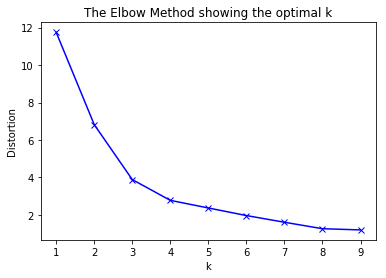

In [87]:
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
    k_means.fit(Business_Density['Business Density'].values.reshape(-1, 1))
    distortions.append(sum(np.min(cdist(Business_Density['Business Density'].values.reshape(-1, 1),
                                        k_means.cluster_centers_, 'euclidean'), axis=1)) / Business_Density['Business Density'].shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### Using the elbow method, the optimal value of k = 5.

Generate k = 5 economic clusters from the business and technology ecosystem dataset

In [100]:
# set number of clusters
kclusters = 5

Business_clustering = Business_Clusters.drop('Hub', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Business_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [101]:
Hubs_Business_sorted.shape

(176, 11)

In [102]:
Top10_venues = Hubs_Business_sorted.copy()

In [103]:
Top10_venues['Cluster Labels'] = kmeans.labels_
Top10_venues.head()

,Hub,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,302Labs,Café,Supermarket,Italian Restaurant,Toy / Game Store,Dessert Shop,Paper / Office Supplies Store,Squash Court,Juice Bar,Seafood Restaurant,Egyptian Restaurant,0
1,3abbar,Plaza,Café,Kebab Restaurant,Outdoor Sculpture,Cricket Ground,Dutch Restaurant,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,0
2,"88mph Garage, Nairobi",Golf Course,Gym,Playground,Coffee Shop,History Museum,Performing Arts Venue,Chinese Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,4
3,AKENDEWA TECH HUB,Clothing Store,Athletics & Sports,Zoo Exhibit,Eastern European Restaurant,Food & Drink Shop,Food,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,4
4,AMN Co Working Space,Boat or Ferry,Zoo Exhibit,Food Service,Food & Drink Shop,Food,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,4


In [ ]:
CopyTop10_venues = Top10_venues.copy()

#### Understanding the clustered business and technology ecosystem dataset

Analyze the density distribution of technology hubs per unique economic cluster

In [116]:
# Analyze the density distribution of technology hubs per unique economic cluster

Hubs_Density = CopyTop10_venues.groupby('Cluster Labels').count()
Hubs_Density = pd.DataFrame(list(zip(Hubs_Density.index, Hubs_Density['Hub'])), 
                                  columns=['Cluster Labels', 'Hubs Density'])
Hubs_Density.head()

,Cluster Labels,Hubs Density
0,0,15
1,1,4
2,2,12
3,3,3
4,4,142


##### Visualize the distribution of technology hubs over the 5 distinct economic clusters

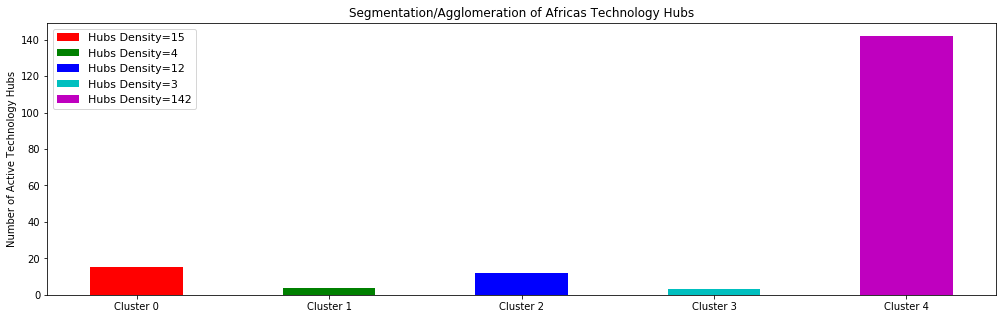

In [120]:
fig, ax = plt.subplots(figsize=(17,5))
clusters= ['Cluster 0','Cluster 1','Cluster 2',
           'Cluster 3','Cluster 4']
colors = ['r','g','b','c','m']
legend = []

for id, cluster in enumerate(clusters):
    legend.append('Hubs Density={}'.format(Hubs_Density['Hubs Density'][id]))
    bar = ax.bar(cluster, Hubs_Density['Hubs Density'][id], 0.48, color=colors[id])

ax.set_ylabel('Number of Active Technology Hubs')
ax.set_title('Segmentation/Agglomeration of Africas Technology Hubs')
# ax.set_facecolor((1,1,1))
# ax.grid(True, axis='y',color='k', linestyle='-', linewidth=1)

plt.legend(legend, fontsize=11)

plt.show()

### Analyze and Classify Economic Clusters

Assign names to each unique economic cluster based on their unique discriminating features.

#### Explore the Economic Clusters by the agglomeration of business and technology ecosystem

In [121]:
# Merge the venues Density and the Hubs Business data frame
Economic_Cluster_df = venues_Density.join(Top10_venues.set_index('Hub'), on='Hubs')
Economic_Cluster_df.head()

,Hubs,# of Business venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,302Labs,16,Café,Supermarket,Italian Restaurant,Toy / Game Store,Dessert Shop,Paper / Office Supplies Store,Squash Court,Juice Bar,Seafood Restaurant,Egyptian Restaurant,0
1,3abbar,6,Plaza,Café,Kebab Restaurant,Outdoor Sculpture,Cricket Ground,Dutch Restaurant,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,0
2,"88mph Garage, Nairobi",7,Golf Course,Gym,Playground,Coffee Shop,History Museum,Performing Arts Venue,Chinese Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,4
3,AKENDEWA TECH HUB,2,Clothing Store,Athletics & Sports,Zoo Exhibit,Eastern European Restaurant,Food & Drink Shop,Food,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,4
4,AMN Co Working Space,1,Boat or Ferry,Zoo Exhibit,Food Service,Food & Drink Shop,Food,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,4


### Explore each unique Cluster for its geographic and economic implications

#### CLUSTER 0

In [148]:
Cluster_0 = Economic_Cluster_df.loc[Economic_Cluster_df['Cluster Labels'] == 0, Economic_Cluster_df.columns[[0, 1, 2, 11, 12]]]
Cluster_0

,Hubs,# of Business venues,1st Most Common Venue,10th Most Common Venue,Cluster Labels
0,302Labs,16,Café,Egyptian Restaurant,0
1,3abbar,6,Plaza,Farmers Market,0
15,Alexandria Hackerspace,6,Plaza,Farmers Market,0
17,BIL Conference Tunisia,5,Café,Event Space,0
41,Dar Tekinohama Business Incubator (DTBI),6,Café,Farmers Market,0
45,El-Minya Hacker space,4,Café,Falafel Restaurant,0
51,Fab Lab Egypt,29,Café,Bakery,0
54,FabLabTanger (ENSAT),4,Plaza,Farmers Market,0
55,Fablab Tembisa (Ekurhuleni fablab),1,Café,Event Space,0
71,HackZone,2,Café,Event Space,0


In [135]:
print('Cluster 0: Geographic/Economic Implications:')
print('    {}  Active technology Hubs'.format(Cluster_0['Hubs'].count()))
print('    {}  Business venues and interests'.format(Cluster_0['# of Business venues'].sum(axis=0)))

print('Cluster 0 classified as HIGH-DENSITY DIGITAL HUB based on its unique discriminating features and economic clusters')

Cluster 0: Geographic/Economic Implications:
    15  Active technology Hubs
    167  Business venues and interests
Cluster 0 classified as HIGH-DENSITY DIGITAL HUB based on its unique discriminating features and economic clusters


#### CLUSTER 1

In [136]:
Cluster_1 = Economic_Cluster_df.loc[Economic_Cluster_df['Cluster Labels'] == 1, Economic_Cluster_df.columns[[0, 1, 2, 11, 12]]]
Cluster_1

,Hubs,# of Business venues,1st Most Common Venue,10th Most Common Venue,Cluster Labels
47,Emerging Leaders in Technology and Engineering...,3,Bus Station,Falafel Restaurant,1
61,GRATIS Northern,2,Record Shop,Event Space,1
64,GRATIS Upper West,1,Bus Station,Falafel Restaurant,1
136,Takoradi Technical Institute Fab Lab,4,Bus Station,Falafel Restaurant,1


In [138]:
print('Cluster 1: Geographic/Economic Implications:')
print('    {}  Active technology Hubs'.format(Cluster_1['Hubs'].count()))
print('    {}  Business venues and interests'.format(Cluster_1['# of Business venues'].sum(axis=0)))

print('Cluster 1 classified as LOW-DENSITY DIGITAL HUB based on its unique discriminating features and economic clusters')

Cluster 1: Geographic/Economic Implications:
    4  Active technology Hubs
    10  Business venues and interests
Cluster 1 classified as LOW-DENSITY DIGITAL HUB based on its unique discriminating features and economic clusters


#### CLUSTER 2

In [139]:
Cluster_2 = Economic_Cluster_df.loc[Economic_Cluster_df['Cluster Labels'] == 2, Economic_Cluster_df.columns[[0, 1, 2, 11, 12]]]
Cluster_2

,Hubs,# of Business venues,1st Most Common Venue,10th Most Common Venue,Cluster Labels
20,Bantalabs Senegal,2,Bar,Falafel Restaurant,2
29,Burundi Business Incubator (BBIN),3,Hotel,Falafel Restaurant,2
32,CTIC DAKAR,2,Hotel,Falafel Restaurant,2
35,Centre Songhaï,1,Bar,Falafel Restaurant,2
49,FABlab Namibia,4,Restaurant,Falafel Restaurant,2
104,Mobile Web Ghana,7,Theater,Flea Market,2
105,MobileSenegal,2,Hotel,Falafel Restaurant,2
110,Namibia Business Innovation Centre (NBIC),4,Hotel,Event Space,2
112,North West University,2,Bar,Event Space,2
125,"Sahara Labs - Tarfaya,Hackerspace",1,Hotel,Event Space,2


In [141]:
print('Cluster 2: Geographic/Economic Implications:')
print('    {}  Active technology Hubs'.format(Cluster_2['Hubs'].count()))
print('    {}  Business venues and interests'.format(Cluster_2['# of Business venues'].sum(axis=0)))

print('Cluster 2 classified as MEDIUM HIGH-DENSITY DIGITAL HUB based on its unique discriminating features and economic clusters')

Cluster 2: Geographic/Economic Implications:
    12  Active technology Hubs
    33  Business venues and interests
Cluster 2 classified as MEDIUM HIGH-DENSITY DIGITAL HUB based on its unique discriminating features and economic clusters


#### CLUSTER 3

In [142]:
Cluster_3 = Economic_Cluster_df.loc[Economic_Cluster_df['Cluster Labels'] == 3, Economic_Cluster_df.columns[[0, 1, 2, 11, 12]]]
Cluster_3

,Hubs,# of Business venues,1st Most Common Venue,10th Most Common Venue,Cluster Labels
58,"G Space, Busy Internet",2,Cruise,Farmers Market,3
77,Hubsocial,3,Cruise,Falafel Restaurant,3
160,Zamrize,2,Cruise,Farmers Market,3


In [143]:
print('Cluster 3: Geographic/Economic Implications:')
print('    {}  Active technology Hubs'.format(Cluster_3['Hubs'].count()))
print('    {}  Business venues and interests'.format(Cluster_3['# of Business venues'].sum(axis=0)))

print('Cluster 3 classified as VERY LOW-DENSITY DIGITAL HUB based on its unique discriminating features and economic clusters')

Cluster 3: Geographic/Economic Implications:
    3  Active technology Hubs
    7  Business venues and interests
Cluster 3 classified as VERY LOW-DENSITY DIGITAL HUB based on its unique discriminating features and economic clusters


#### CLUSTER 4

In [144]:
Cluster_4 = Economic_Cluster_df.loc[Economic_Cluster_df['Cluster Labels'] == 4, Economic_Cluster_df.columns[[0, 1, 2, 11, 12]]]
Cluster_4

,Hubs,# of Business venues,1st Most Common Venue,10th Most Common Venue,Cluster Labels
2,"88mph Garage, Nairobi",7,Golf Course,Electronics Store,4
3,AKENDEWA TECH HUB,2,Clothing Store,Farmers Market,4
4,AMN Co Working Space,1,Boat or Ferry,Falafel Restaurant,4
5,ARO Fablab,5,Soup Place,Eastern European Restaurant,4
6,AUC Venture Labs,68,Café,Fast Food Restaurant,4
7,ActivSpaces Buea,1,Trail,Event Space,4
8,ActivSpaces Douala,13,Bakery,Food,4
9,Afri Banana Products Ltd (ABP),31,Café,Comedy Club,4
10,Agbogbloshie makerspace platform,5,Pharmacy,Fast Food Restaurant,4
11,Agribusiness Incubation Trust (AgBIT),13,Movie Theater,American Restaurant,4


In [147]:
print(' {} Active technology hubs in Cluster 4'.format(Cluster_4.shape[0]))

Cluster_4.head()

 142 Active technology hubs in Cluster 4


,Hubs,# of Business venues,1st Most Common Venue,10th Most Common Venue,Cluster Labels
2,"88mph Garage, Nairobi",7,Golf Course,Electronics Store,4
3,AKENDEWA TECH HUB,2,Clothing Store,Farmers Market,4
4,AMN Co Working Space,1,Boat or Ferry,Falafel Restaurant,4
5,ARO Fablab,5,Soup Place,Eastern European Restaurant,4
6,AUC Venture Labs,68,Café,Fast Food Restaurant,4


In [145]:
print('Cluster 4: Geographic/Economic Implications:')
print('    {}  Active technology Hubs'.format(Cluster_4['Hubs'].count()))
print('    {}  Business venues and interests'.format(Cluster_4['# of Business venues'].sum(axis=0)))

print('Cluster 4 classified as VERY HIGH-DENSITY DIGITAL HUB based on its unique discriminating features and economic clusters')

Cluster 4: Geographic/Economic Implications:
    142  Active technology Hubs
    2087  Business venues and interests
Cluster 4 classified as VERY HIGH-DENSITY DIGITAL HUB based on its unique discriminating features and economic clusters


### This is the End of this Project. Thank You.